<a href="https://colab.research.google.com/github/bugatha1/Tensorflow/blob/main/Tensorflow_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [4]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [19]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
  tf.keras.layers.Dense(1, name='output_layer')                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Total params : total number of parameters in the model.<br>
Trainable params: these are the parameters (patterns) the model can update as it trains.<br>
Non-Trainalbe params : these are the parameters aren't updated during training (this is typically when you bring in already learn patterns or parameters from other models during **transfer learning** <br>


In [21]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 23.8575 - mae: 23.8575
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 21.4466 - mae: 21.4466
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 19.6745 - mae: 19.6745
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.7556 - mae: 14.7556
Epoch 5/100
2/2 [==============================] - 0s 14ms/step - loss: 15.2730 - mae: 15.2730
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 15.3197 - mae: 15.3197
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 13.0403 - mae: 13.0403
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 28.2898 - mae: 28.2898
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0067 - mae: 10.0067
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.4754 - mae: 10.4754
Epoch 11/100
2/2 [==============================] - 0s 9m

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


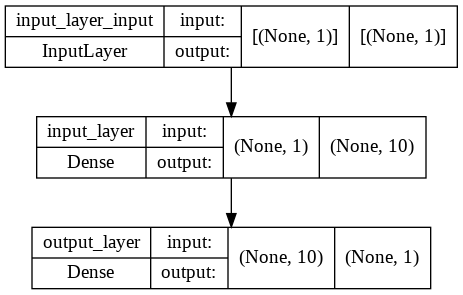

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

In [24]:
y_pred = model.predict(X_test)
y_pred

array([[54.700504],
       [58.23442 ],
       [61.76833 ],
       [65.30225 ],
       [68.83617 ],
       [72.37007 ],
       [75.90399 ],
       [79.437904],
       [82.97182 ],
       [86.50573 ]], dtype=float32)

In [25]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [26]:
import matplotlib.pyplot as plt

def plot_predictions(train_data=X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c='r', label='training data')
  plt.scatter(test_data, test_labels, c='b', label='testing data')
  plt.scatter(test_data, predictions, c='g', label='predicton data')
  plt.legend();


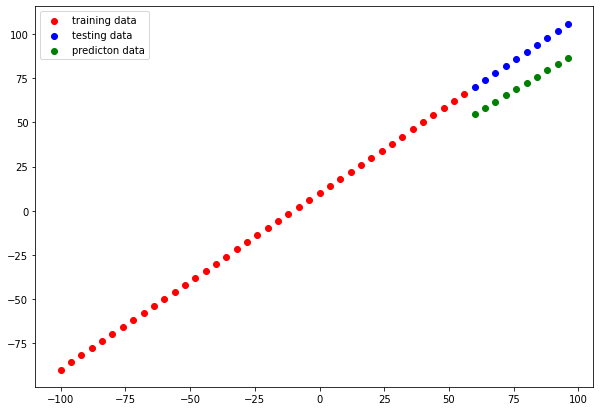

In [27]:
plot_predictions()

In [28]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 296ms/step - loss: 17.3969 - mae: 17.3969


[17.396881103515625, 17.396881103515625]

In [29]:
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.299496, 29.76558 , 26.23167 , 22.697746, 19.163834, 16.103943,
       13.657605, 11.824839, 10.605637, 10.      ], dtype=float32)>

In [42]:
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [41]:
tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=17.396881>

In [43]:
tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=304.44366>

In [44]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [48]:
tf.random.set_seed = 42

model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                             
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 89.8928 - mae: 89.8928
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 53.6724 - mae: 53.6724
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 18.5325 - mae: 18.5325
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 12.6962 - mae: 12.6962
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4163 - mae: 9.4163
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 7.5844 - mae: 7.5844
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 8.7917 - mae: 8.7917
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 10.4068 - mae: 10.4068
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0774 - mae: 11.0774
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 13.6739 - mae: 13.6739
Epoch 11/100
2/2 [==============================] - 0s 10m

In [49]:
y_preds1 = model.predict(X_test)
y_preds1

array([[ 70.27403 ],
       [ 74.87138 ],
       [ 79.468735],
       [ 84.066086],
       [ 88.66344 ],
       [ 93.26079 ],
       [ 97.85815 ],
       [102.4555  ],
       [107.05285 ],
       [111.6502  ]], dtype=float32)

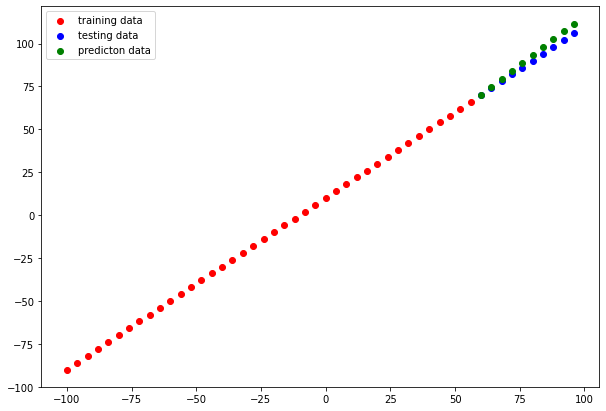

In [50]:
plot_predictions(predictions=y_preds1)

In [53]:
mae1 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds1))
mse1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds1))
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.9621155>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.717973>)